## Problem Statement: 

**The goal is to identify the characteristics of the target audience for each AeroFit treadmill product (KP281, KP481, KP781) to better recommend treadmills to new customers. This involves understanding whether there are differences across products with respect to customer characteristics.**

## Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
df = pd.read_csv('/kaggle/input/aerofit-data/aerofit_treadmill.csv')

# Display the first few rows of the dataset
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Non-Graphical Analysis

In [3]:
# Checking the structure and summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

## Visual Analysis

### Univariate Analysis

In [8]:
def plot_continuous_variable(data, variable, type='hist'):
    # Histogram
    if type=='hist':
        sns.histplot(data[variable].dropna(), color='blue', kde=True)
        plt.title(f'Histogram of {variable}')
    
    
def plot_categorical_variable(data, category, rotation=0):
    # Boxplot
    if len(data[category].value_counts()) > 5:
        top_5_categories = data[category].value_counts().nlargest(5).index
    # Filter the data to include only the top 5 categories
        filter_data = data[data[category].isin(top_5_categories)]
        sns.countplot(data=filter_data, x=category, palette='Set2', order=filter_data[category].value_counts().index)
        plt.xticks(rotation=rotation)
    else:
        sns.countplot(data=data, x=category, palette='Set2')
    plt.title(f'Barplot of {category}')
    plt.xlabel(category)
    


In [9]:
cat_cols = ['Product','Gender','MaritalStatus']
num_cols = ['Age','Education','Usage','Fitness','Income','Miles']

#### Numerical data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

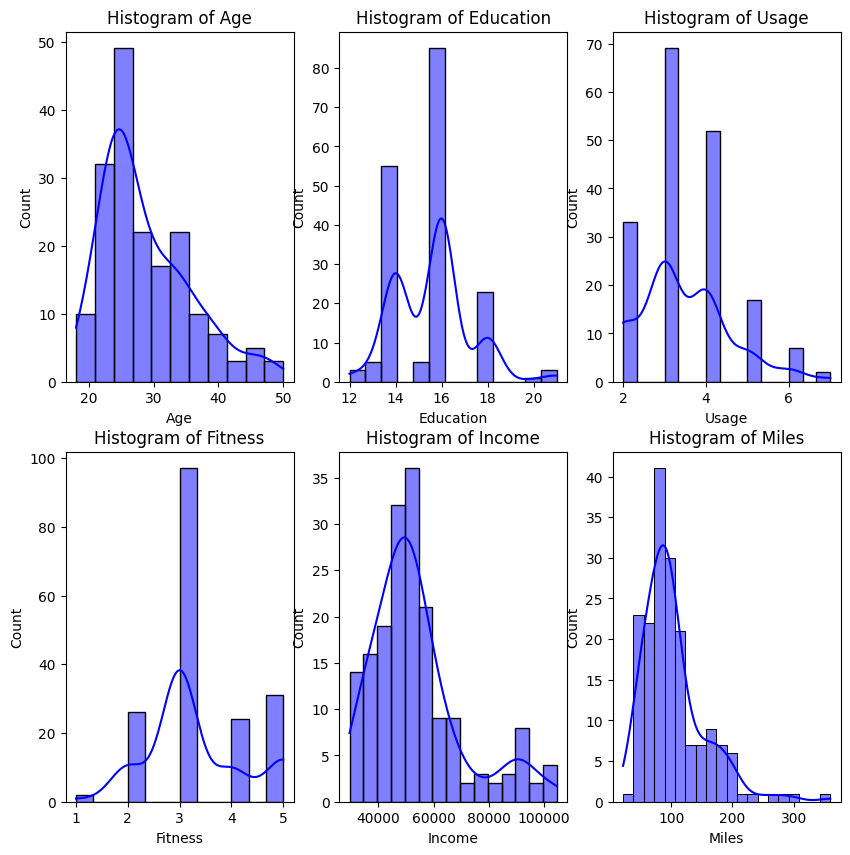

In [10]:
plt.figure(figsize=(10, 10))
i = 1
for col in num_cols:
    plt.subplot(2, 3, i)
    plot_continuous_variable(df, col, 'hist')
    i += 1
plt.show()

**Most of the numerical data is close to or almost normally distributed data.**

#### Categorical Data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

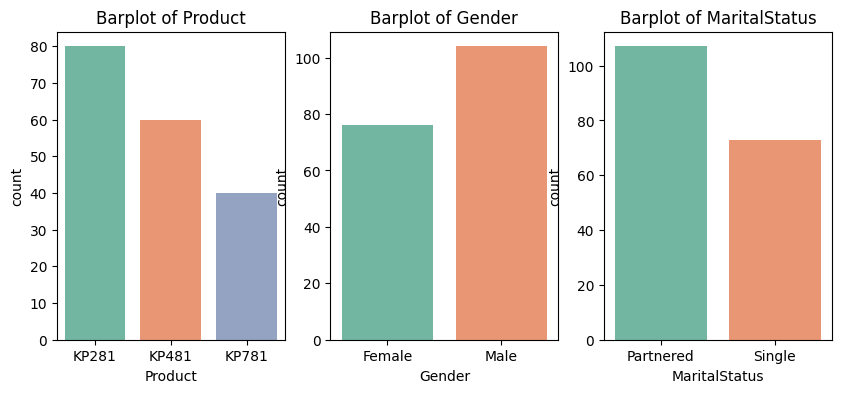

In [11]:
plt.figure(figsize=(10, 4))
i = 1
for col in cat_cols:
    plt.subplot(1, 3, i)
    plot_categorical_variable(df, col)
    i += 1

* **Mojority of data is on Product KP281.**
* **Most of the data is of Males and Partnered.**

### Bi-variate Analysis

In [12]:
def plot_bivariate_plot_NC(data, category, variable):
    sns.violinplot(x=df[category].dropna(), y=df[variable].dropna())
    plt.title(f'violinplot of {variable} by {category}',fontdict={'fontsize':10})
    plt.xlabel(category)
    plt.ylabel(variable)

    
def plot_bivariate_plot_CC(data, category_1, category_2, rotation=0):
    sns.countplot(data=data, x=category_1, hue=category_2, palette='Set2')
    plt.xticks(rotation=rotation)
    plt.title(f'Grouped Barplot of {category_1} and {category_2}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Define a function to create the required bivariate plots for continuous-continuous variables
def plot_bivariate_plot_NN(data, variable_1, variable_2):
    # Scatterplot
    sns.scatterplot(x=variable_1, y=variable_2, data=data)
    plt.title(f'scatterPlot of {variable_1} by {variable_2}')
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)


#### Categorical - Continuous Data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

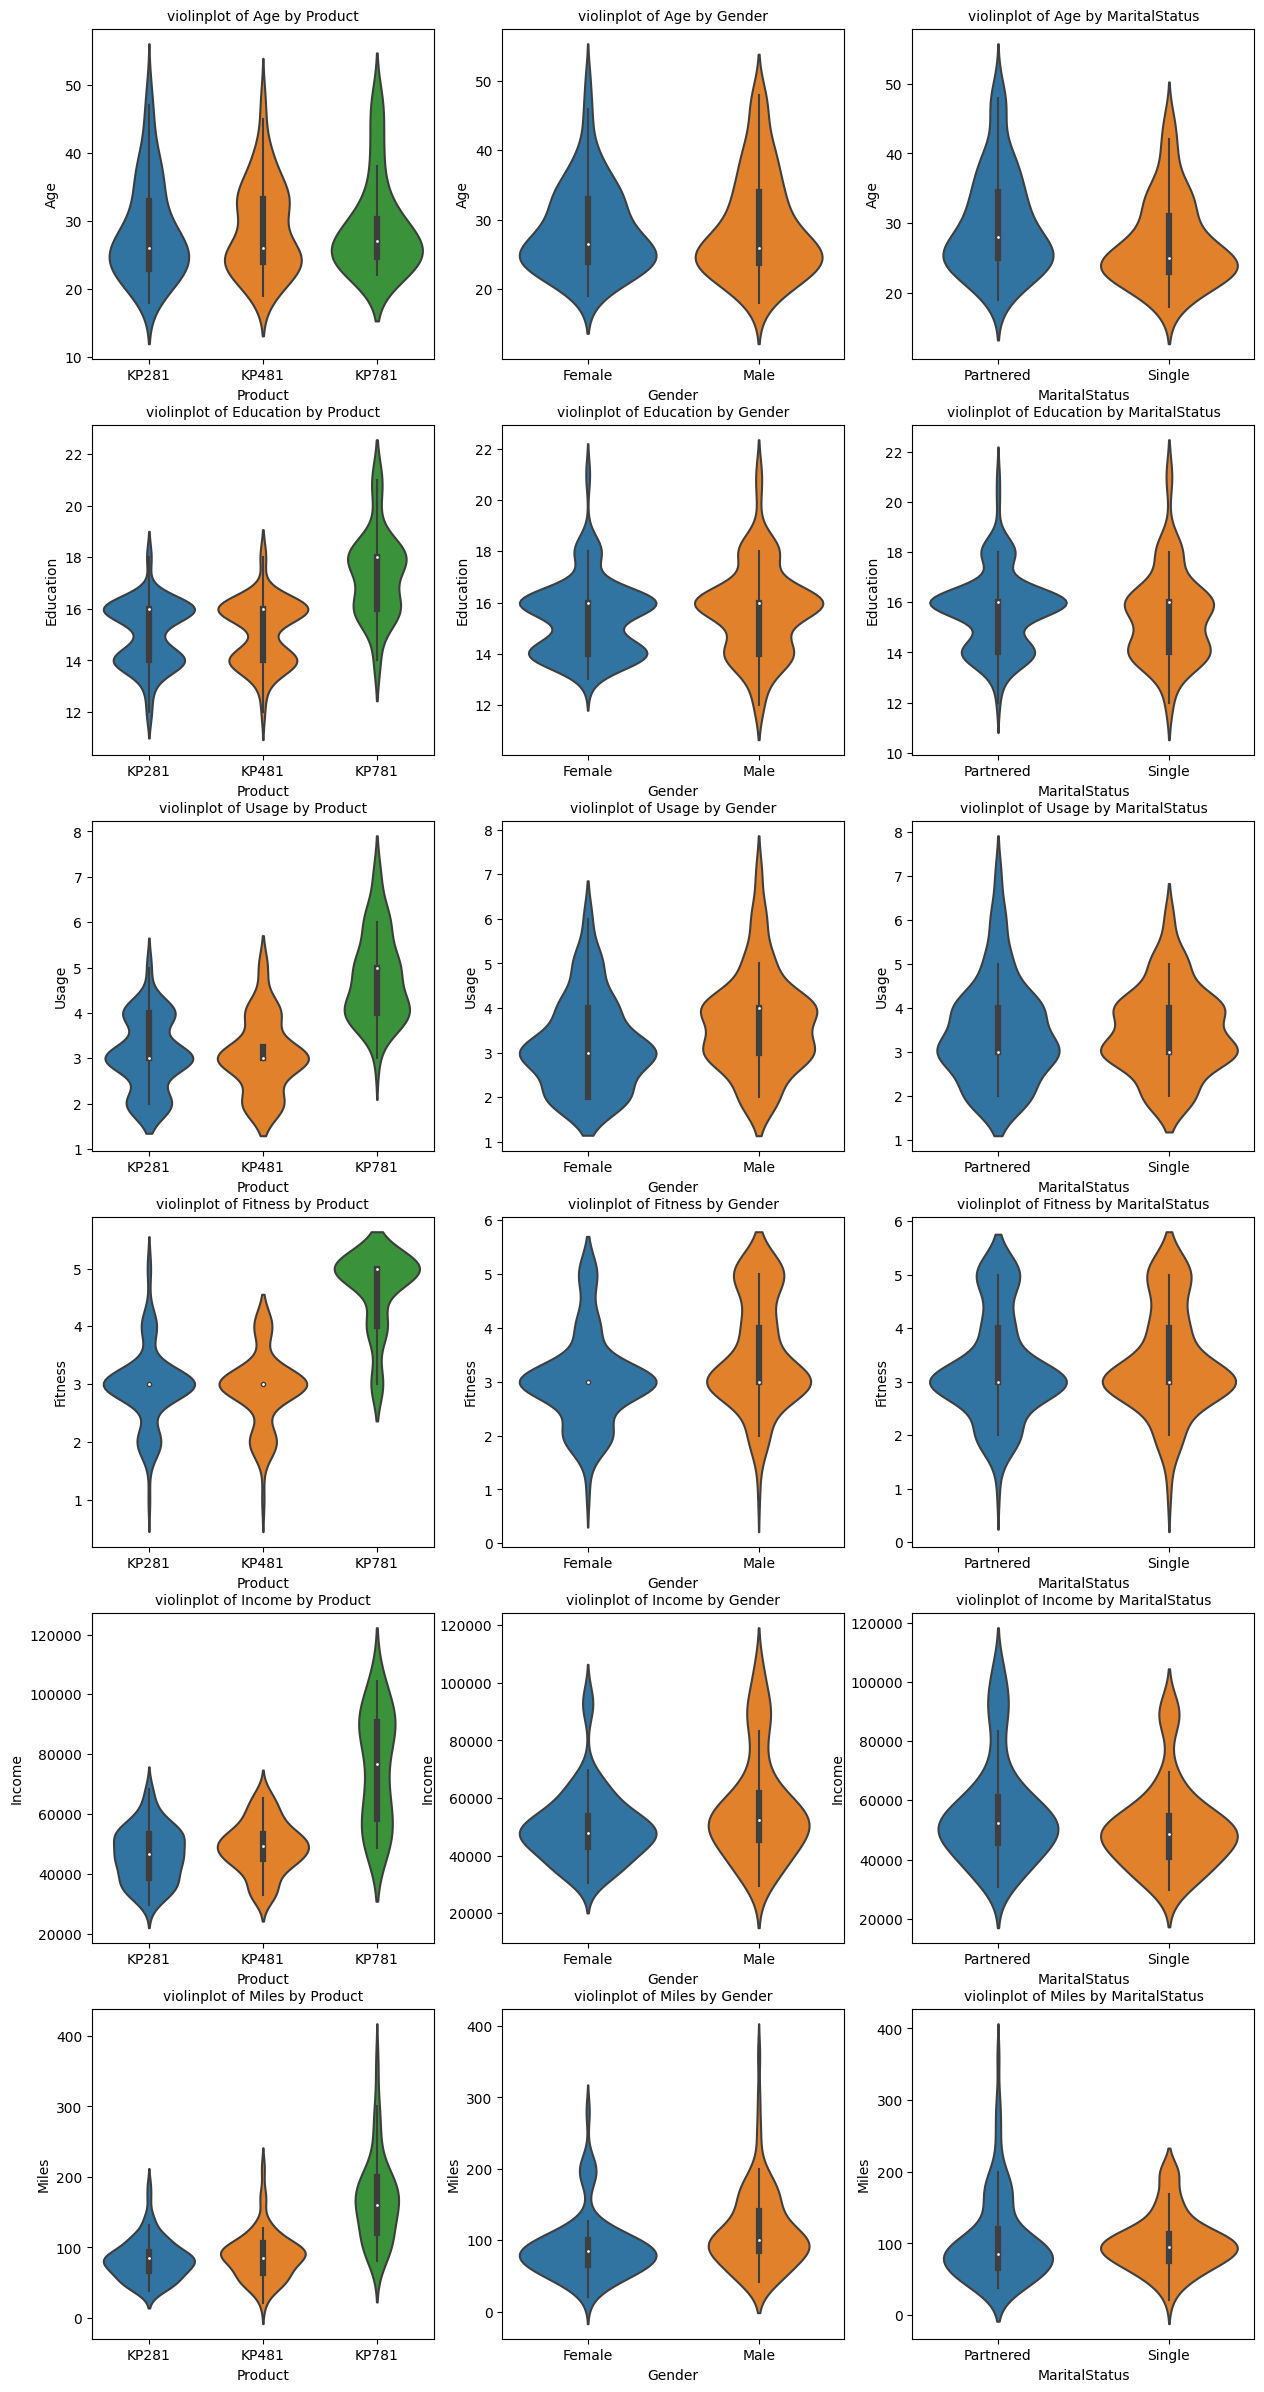

In [13]:
plt.figure(figsize=(15,30))
i = 1
for col_n in num_cols:
    for col_c in cat_cols:
        plt.subplot(6, 3, i)
        plot_bivariate_plot_NC(df, col_c, col_n)
        i += 1
plt.show()

#### Categorical - Categorical Data

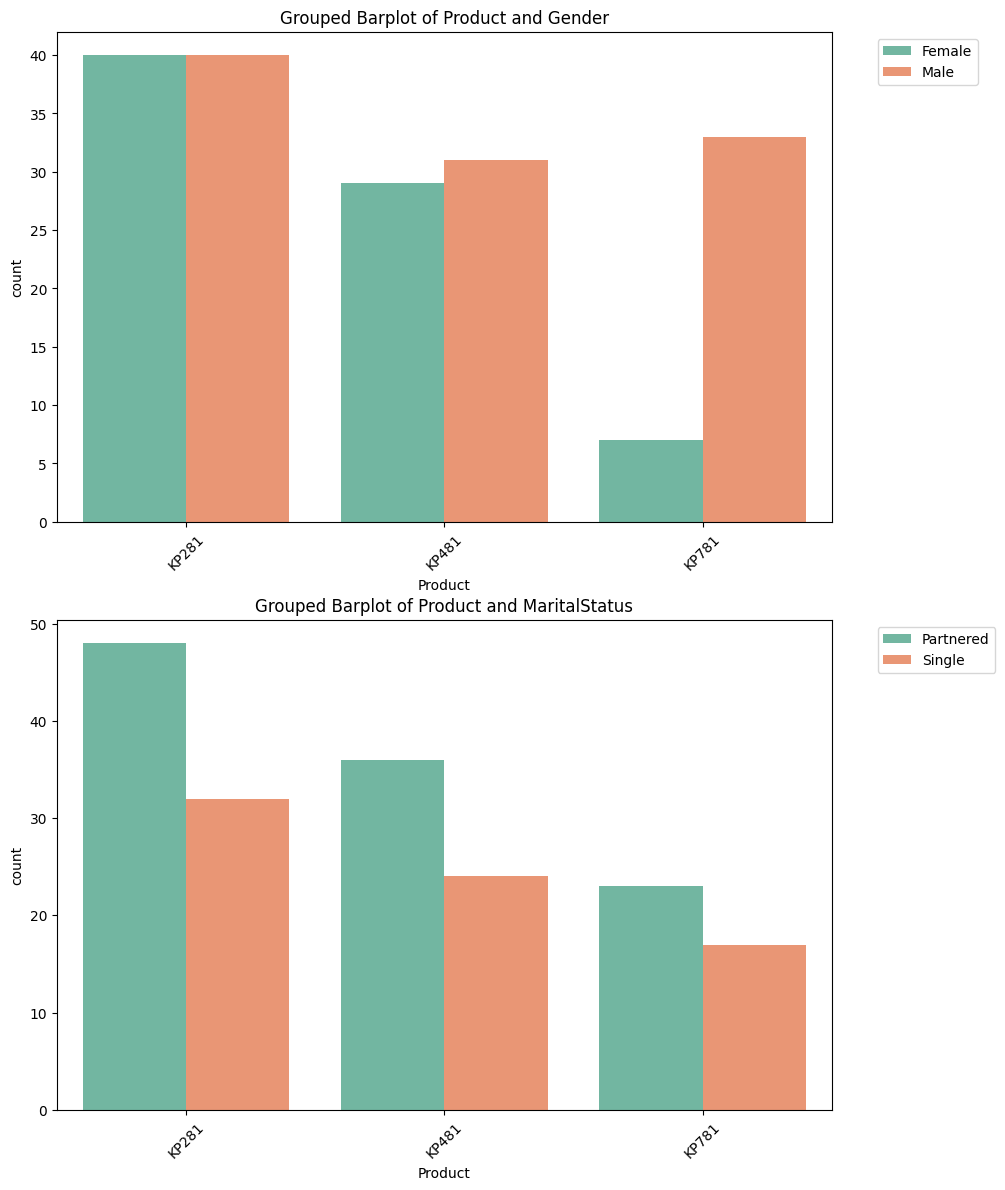

In [14]:
plt.figure(figsize=(10, 14))
plt.subplot(2, 1, 1)
plot_bivariate_plot_CC(df, cat_cols[0], cat_cols[1], 45)
plt.subplot(2, 1, 2)
plot_bivariate_plot_CC(df, cat_cols[0], cat_cols[2], 45)
plt.show()

#### Continuous - Continuous Data

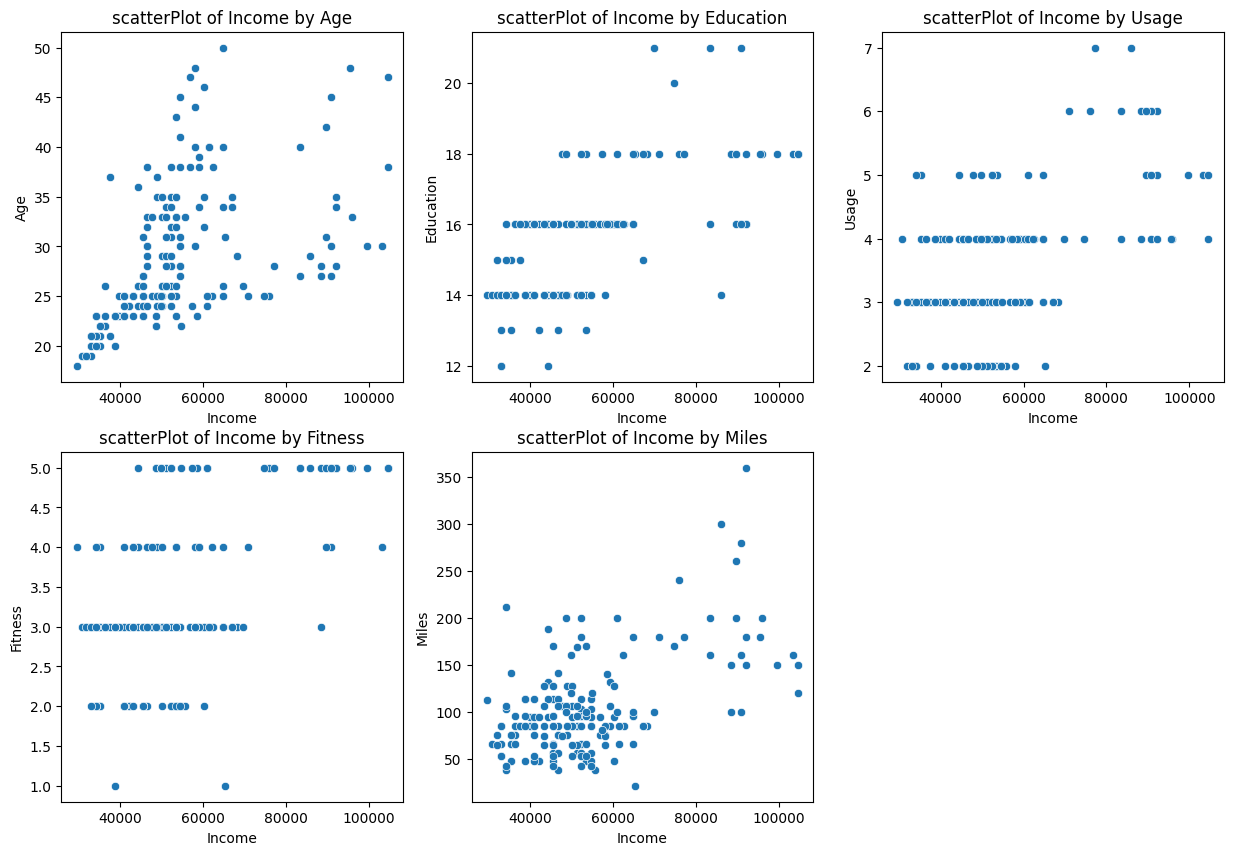

In [15]:
plt.figure(figsize=(15, 10))
i = 1
for col in num_cols:
    if col!='Income':
        plt.subplot(2, 3, i)
        plot_bivariate_plot_NN(df, 'Income', col)
        i += 1
plt.show()

**Most of the numerical data is not trending closely with the income, so income isn't dependant on most of the other numerical columns.**

### Correlation Analysis

#### Correlation Heatmap 

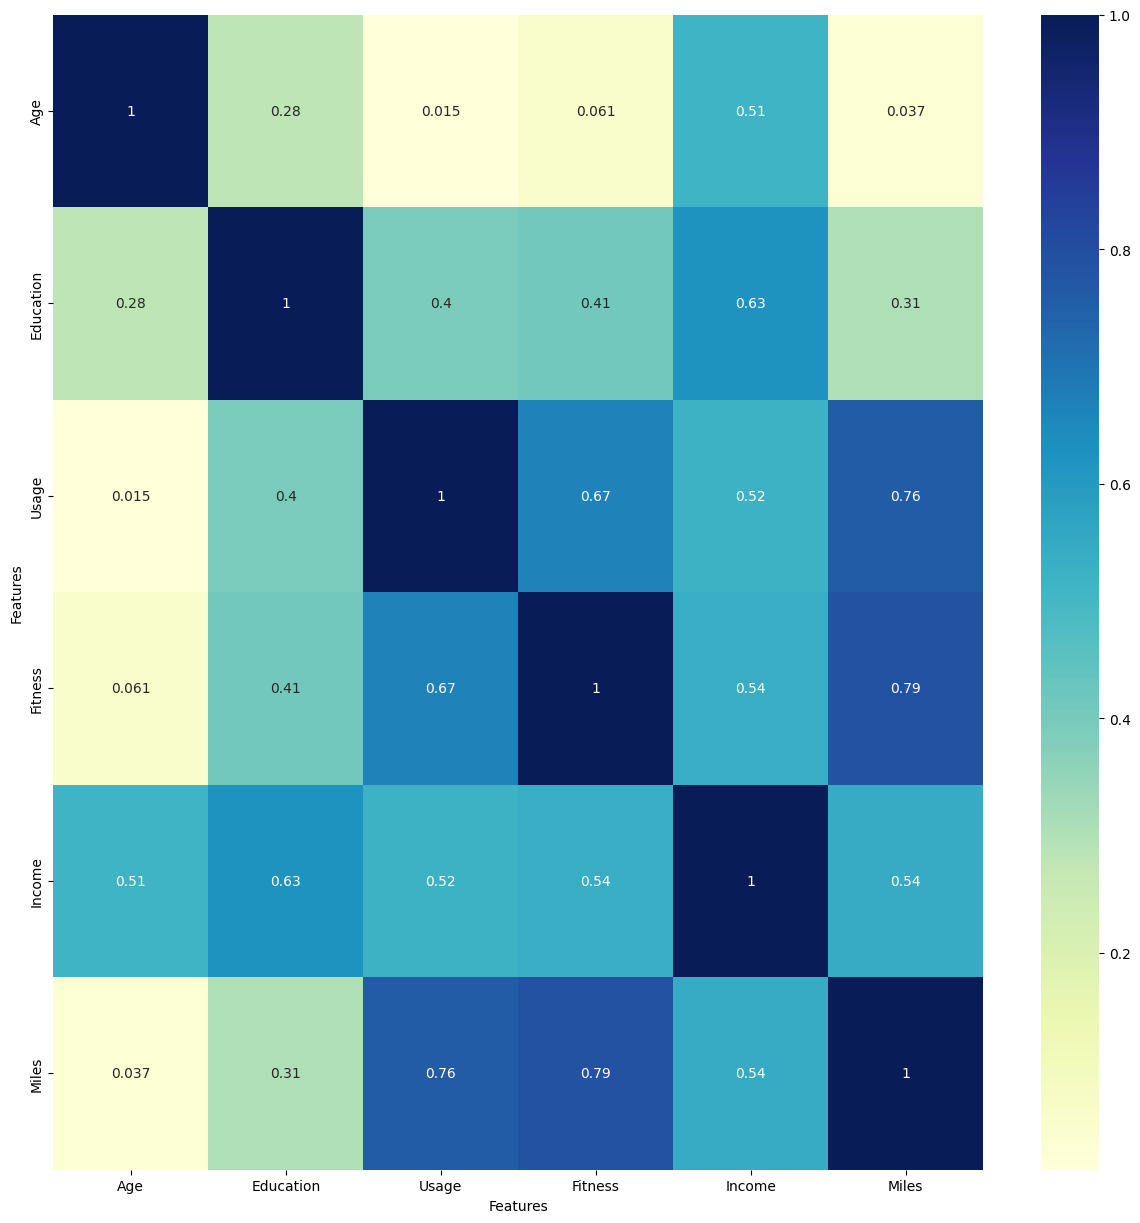

In [16]:

correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

- **Age:**
Positive Correlation with Income (0.513): Older customers tend to have higher incomes. This makes sense as income typically increases with age and career progression.
Weak Correlations with Other Variables: Age does not strongly correlate with education, usage, fitness, or miles, suggesting that these factors are relatively independent of age.

- **Education:**
Positive Correlation with Income (0.626): Higher educational levels are associated with higher incomes, which is a common socio-economic trend.
Moderate Correlation with Fitness (0.411) and Usage (0.395): Better-educated customers tend to rate their fitness higher and use the treadmill more frequently. This suggests a link between education and health-conscious behavior.
Positive Correlation with Miles (0.307): Higher education levels slightly correlate with the number of miles run or walked, reflecting a trend of educated individuals engaging more in physical activities.

- **Usage:**
Strong Correlation with Miles (0.759): Customers who use the treadmill more frequently tend to cover more miles. This is intuitive as higher usage generally means more miles.
Strong Correlation with Fitness (0.669): Higher treadmill usage is associated with better self-rated fitness levels. Regular use of the treadmill contributes to improved fitness.
Moderate Correlation with Income (0.520): Higher income individuals tend to use the treadmill more frequently, possibly due to better access to fitness resources.

- **Fitness:**
Strong Correlation with Miles (0.786): Customers who rate their fitness higher tend to cover more miles on the treadmill. This reflects the relationship between physical activity and fitness levels.
Moderate Correlation with Income (0.535): Wealthier customers tend to rate their fitness higher, likely due to better access to fitness and healthcare facilities.

- **Income:**
Moderate to Strong Correlations with Other Variables: Income shows moderate to strong positive correlations with education (0.626), usage (0.520), fitness (0.535), and miles (0.543). This indicates that higher-income individuals are generally more educated, use the treadmill more, have higher fitness levels, and cover more miles.

- **Miles:**
Strong Correlation with Fitness (0.786) and Usage (0.759): More miles run or walked are associated with higher fitness levels and greater treadmill usage.
Moderate Correlation with Income (0.543): Higher income is associated with more miles covered, possibly due to better access to fitness equipment and a healthier lifestyle.

#### Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

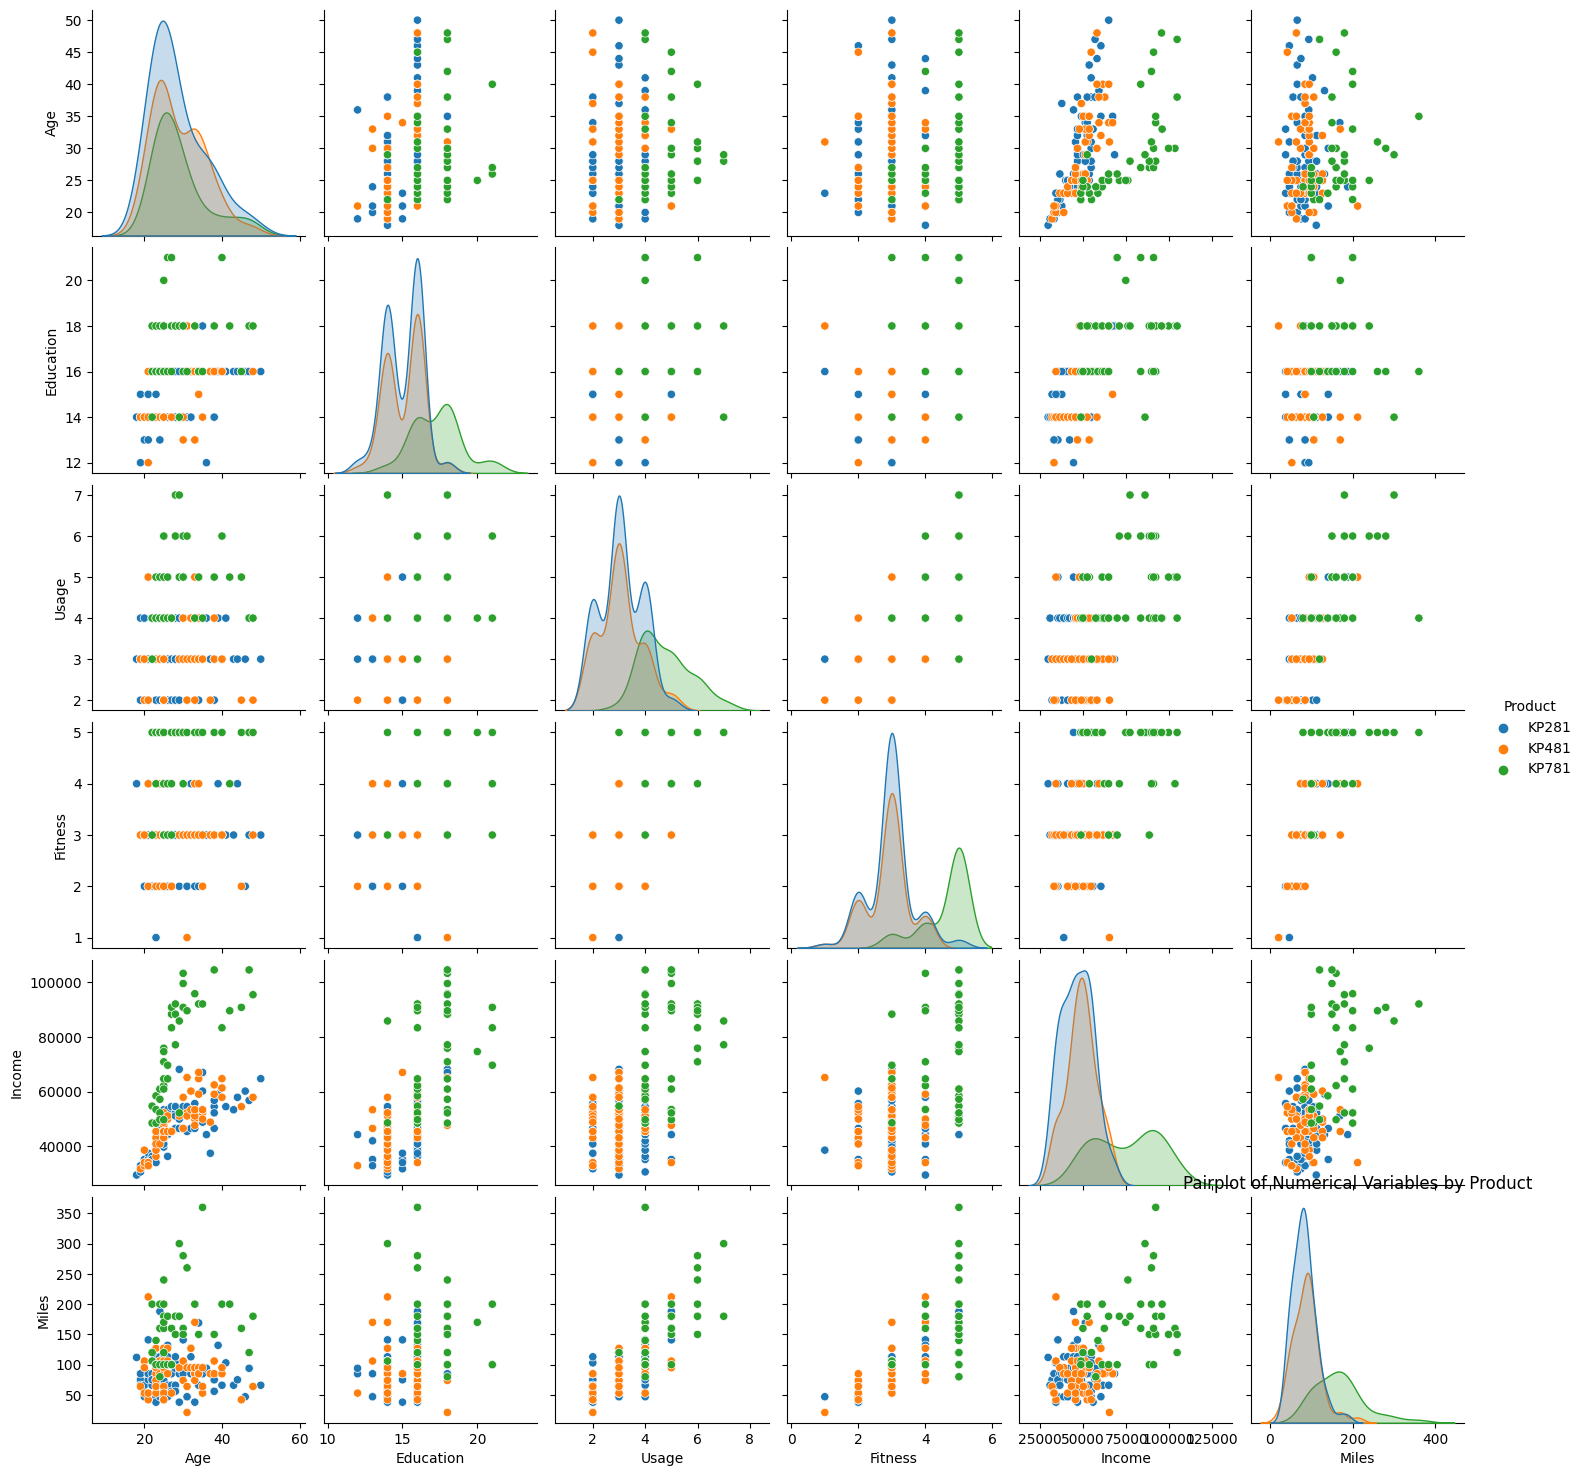

In [17]:
sns.pairplot(df, hue='Product')
plt.title('Pairplot of Numerical Variables by Product')
plt.show()


## Outlier Detection

In [18]:
# Checking for outliers using IQR method
num_data = df[num_cols]
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
outliers = num_data[(num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))].dropna(how='all')
outliers

,Age,Education,Usage,Fitness,Income,Miles
14,NaN,NaN,NaN,1.0,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,188.0
78,47.0,NaN,NaN,NaN,NaN,NaN
79,50.0,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,212.0
117,NaN,NaN,NaN,1.0,NaN,NaN
139,48.0,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,200.0
148,NaN,NaN,NaN,NaN,NaN,200.0
152,NaN,NaN,NaN,NaN,NaN,200.0


## Marginal Probability

In [19]:
# Marginal probability of each product being purchased
product_counts = df['Product'].value_counts(normalize=True)
product_counts


Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

## Conditional Probability/Two-way Contingency Tables

In [20]:
# Contingency table for Product and Gender
contingency_table_gender = pd.crosstab(df['Product'], df['Gender'], normalize='index')
contingency_table_gender

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


* **KP281:** Equal distribution of male and female customers (50% each). This suggests that the KP281 model appeals equally to both genders.
* **KP481:** Slightly more male customers (51.7%) than female customers (48.3%). This indicates a marginally higher preference among males for the KP481 model.
* **KP781:** A significantly higher proportion of male customers (82.5%) compared to female customers (17.5%). This suggests that the KP781 model is predominantly favored by males.

In [21]:
# Contingency table for Product and Marital Status
contingency_table_marital = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index')
contingency_table_marital

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


* **KP281:** 60% of customers are partnered, and 40% are single. This indicates a higher preference for the KP281 model among partnered individuals.
* **KP481:** Similar to KP281, 60% of customers are partnered, and 40% are single. The KP481 model also appeals more to partnered individuals.
* **KP781:** Slightly more partnered customers (57.5%) than single customers (42.5%). Although the distribution is more balanced than KP281 and KP481, the KP781 still has a higher appeal among partnered individuals.

## Insights:

#### Popularity and Customer Segments:
#### KP281:
- **Marginal Probability:** This is the most popular model, purchased by 44.4% of customers.
- **Gender:** Equally popular among both males and females (50% each).
- **Marital Status:** Preferred more by partnered individuals (60%).
- **Insight:** The KP281 is a balanced product appealing to a broad customer base. Its affordability makes it an attractive entry-level option for both genders and partnered individuals.

#### Value Proposition:
#### KP481:
- **Marginal Probability:** The second most popular model, purchased by 33.3% of customers.
- **Gender:** Slightly more preferred by males (51.7%) compared to females (48.3%).
- **Marital Status:** Similar to KP281, it is more popular among partnered individuals (60%).
- **Insight:** The KP481 appeals slightly more to males and partnered individuals who might be looking for a balance between advanced features and price.

#### Premium Features and Niche Market:
#### KP781:
- **Marginal Probability:** The least popular model, purchased by 22.2% of customers.
- **Gender:** Significantly more preferred by males (82.5%).
- **Marital Status:** More balanced but still slightly preferred by partnered individuals (57.5%).
- **Insight:** The KP781 is a premium product appealing predominantly to males and to those who are likely serious about fitness and willing to invest in advanced features.


## Recommendations

#### Targeted Marketing Campaigns:
- **KP281:** Highlight affordability and general appeal. Use diverse marketing platforms that reach both genders equally. Promote family and couple use-cases.
- **KP481:** Emphasize value-for-money with advanced features. Target marketing towards males and partnered individuals. Use testimonials from regular users who found it a worthwhile investment.
- **KP781:** Focus on premium quality and advanced features. Use high-end marketing channels and target affluent, fitness-oriented males. Showcase endorsements from fitness professionals.

#### Product Positioning:
- **KP281:** Position as a versatile and affordable option for beginners and casual users.
- **KP481:** Position as the optimal choice for regular users who seek a balance of advanced features and cost.
- **KP781:** Position as the elite choice for serious fitness enthusiasts and high-income individuals looking for the best features available.

#### Promotions and Bundling:
- Offer bundled packages for KP281 and KP481 that include additional fitness accessories or membership to fitness programs, appealing to partnered and family users.
- For KP781, consider premium service packages, such as extended warranties or personalized fitness plans, to justify the higher price point.

#### Customer Feedback and Continuous Improvement:
- Gather feedback specifically from female users on the KP781 to understand the lower preference and address any gaps.
- Continuously monitor customer satisfaction across all models and make iterative improvements based on customer insights.